In [26]:
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score 

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Meine imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [28]:
def load_dataset_withfeatures_pandas(dataset_path):
    """This function loads CSV datasets using the read_csv method of the pandas library.
    The CSV is expected to be comma-separated, while separate examples are separated by new line.
    All but the last column are expected to be features, the last columns is parsed as output variable."""
    df = pd.read_csv(dataset_path)

    X = df.iloc[:, :-1].to_numpy()
    y = df.iloc[:, -1].to_numpy()

    feature_names = df.iloc[:, :-1].columns.tolist()

    return X, y, feature_names

In [29]:
def kfold_crossval(classifier, X, y, k=10):
    """Evaluates a scikit-learn classifier using k-fold cross-validation. A
    scikit-learn classifier is guaranteed to have the fit(X, y) and predict(X)
    methods through its interface. The function receives a scikit-learn classifier,
    a design (feature) matrix X, a vector of class labels y, and the number of
    folds k, and returns the arithmetic mean of the validation scores and the training
    scores."""

    stratified_shuffled_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=20)
    val_scores = np.empty((k,))
    train_scores = np.empty((k,))

    for i, (train_index, val_index) in enumerate(stratified_shuffled_kfold.split(X, y)):
        # scikit learn implementation of shuffled cross_validation
        # defines splits by returning indices to the provided np arrays

        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # all scikit-learn estimators provide a fit function for training
        classifier.fit(X_train, y_train)

        y_val_pred = classifier.predict(X_val)
        y_train_pred = classifier.predict(X_train)

        val_scores[i] = accuracy_score(y_val, y_val_pred)
        train_scores[i] = accuracy_score(y_train, y_train_pred)

    mean_val_score = np.mean(val_scores)
    mean_train_score = np.mean(train_scores)

    return mean_val_score, mean_train_score

In [30]:
def test_classifier_hyperparams(X, y, classifier, hyperparam_name, hyperparam_values):
    """
    Tests different classifiers for different values of a hyperparameter.
    Expects a design matrix X, a vector of class labels y, a scikit-learn classifier, 
    the name of the hyperparameter as a string, and a list of hyperparameter values.
    
    Returns two lists: mean validation scores and mean training scores for each hyperparameter value.
    """
    mean_val_scores = []
    mean_train_scores = []

    for value in hyperparam_values:
        # Set the hyperparameter on the classifier
        setattr(classifier, hyperparam_name, value)
        
        # Perform k-fold cross-validation
        mean_val_score, mean_train_score = kfold_crossval(classifier, X, y, k=10)
        
        # Collect scores
        mean_val_scores.append(mean_val_score)
        mean_train_scores.append(mean_train_score)

    return mean_val_scores, mean_train_scores

In [31]:
def plot_classifier_hyperparams(hyperparam_name, hyperparam_values, mean_val_scores, mean_train_scores):
    """Plots the mean validation scores and mean training scores for different values of
    a hyperparameter. Expects the name of the hyperparameter as string, a list of
    hyperparameter values, and the mean validation and training scores as np.float
    or python floats."""

    # Use this framework or your own plotting code to answer the moodle quizes

In [35]:
def nth_largest_features(classifier, feature_names, n=10):
    """
    Returns the n most important features and their importances based on Gini importance.
    
    Parameters:
    - classifier: A trained scikit-learn classifier (e.g., RandomForestClassifier).
    - feature_names: A list of feature names corresponding to the design matrix columns.
    - n: Number of top features to return.
    
    Returns:
    - nth_largest_feature_names: A numpy array of the top n feature names.
    - nth_largest_feature_importances: A numpy array of the top n feature importances.
    """
    # Extract feature importances from the classifier
    feature_importances = classifier.feature_importances_

    # Get the indices that would sort the feature importances in ascending order
    sorted_indices = np.argsort(feature_importances)

    # Get the n largest importances and their feature names
    nth_largest_feature_names = np.array(feature_names)[sorted_indices[-n:]]
    nth_largest_feature_importances = feature_importances[sorted_indices[-n:]]

    return nth_largest_feature_names, nth_largest_feature_importances

In [36]:
def plot_feature_importance(feature_names, feature_importances):
    """Plots features and their importances. Feature names and feature importances
    have to have the same length."""

    sorted_indices = np.argsort(feature_importances)[::-1]
    sorted_feature_names = np.array(feature_names)[sorted_indices]
    sorted_feature_importances = np.array(feature_importances)[sorted_indices]
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_feature_names, sorted_feature_importances, color="skyblue")
    plt.xlabel("Feature Importance", fontsize=12)
    plt.ylabel("Features", fontsize=12)
    plt.title("Feature Importance", fontsize=14)
    plt.gca().invert_yaxis()  # Invert the y-axis to show the most important feature on top
    plt.tight_layout()
    plt.show()

## Iris dataset

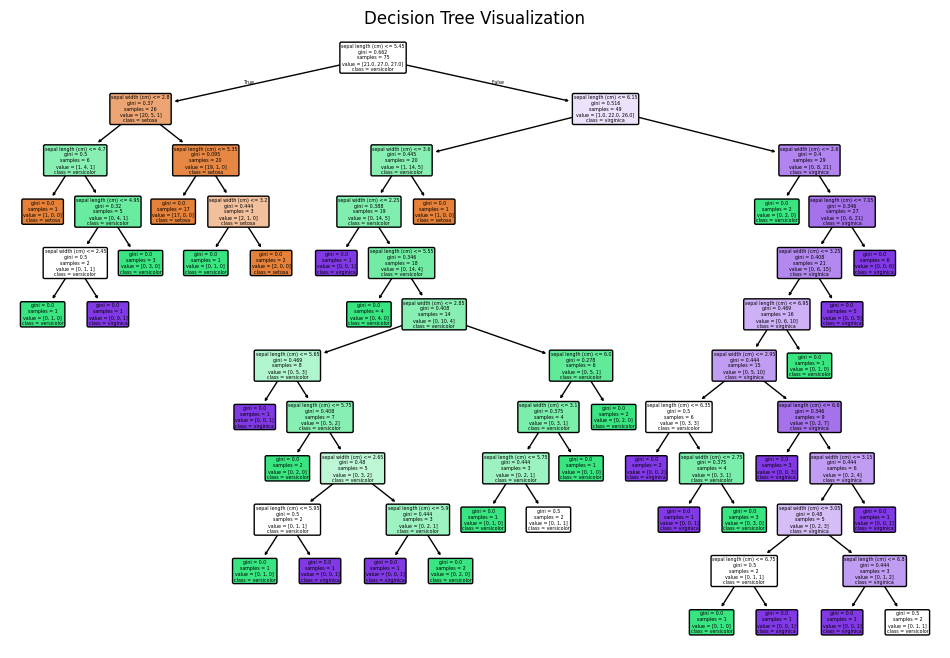

In [40]:
# load data
X, y, feature_names = load_dataset_withfeatures_pandas('./iris_2D.csv')
X_df = pd.DataFrame(X, columns=feature_names) # Convert X to a pandas DataFrame to retain feature names
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.5, random_state=42)


# train decision tree
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# visualize decision tree
plt.figure(figsize=(12, 8))
plot_tree(
    classifier, 
    feature_names=feature_names, 
    class_names=classifier.classes_.astype(str),  # Convert class names to strings if they aren't already
    filled=True, 
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.savefig('iris_tree.png')
plt.show()


## Adult dataset

In [ ]:
# TODO
# load data
# 1.
# for different max_depth
    # train decision tree
    # find out how it performs
# plot what you found (max_depth influence)
# 2.
# for different max_depth
    # train random forest classifier
    # find out how it performs
# plot what you found (max_depth influence)

#### Feature importance

In [ ]:
nth_largest_feature_names, nth_largest_feature_importances = None, None # TODO

plot_feature_importance(nth_largest_feature_names, nth_largest_feature_importances)